In [1]:
import os
BAR = 'Barcodes_1d'
ROOT = open('../root').read().strip()
print ROOT
img_path = os.path.join(ROOT, 'common')
print img_path
anno_path = os.path.join(ROOT, BAR, 'annotations.json')
print anno_path
voc_path = os.path.join(ROOT, 'VOC', 'JPEGImages')
print voc_path

/home/nik-kochetov/work
/home/nik-kochetov/work/common
/home/nik-kochetov/work/Barcodes_1d/annotations.json
/home/nik-kochetov/work/VOC/JPEGImages


In [2]:
import model
reload(model)
from model import PixelsModel
pixels_model = PixelsModel()

Using TensorFlow backend.


In [3]:
import json
with open(anno_path) as f:
    anno = json.loads(f.read())
print len(anno)
print anno[0]

8111
{u'name': u'0001.jpg', u'shape': [3585, 2661, 3], u'Rects': [[594, 1081, 326, 575], [568, 1054, 1131, 1382], [593, 1074, 718, 968], [572, 1057, 1566, 1817], [564, 1050, 1964, 2217], [567, 1048, 2437, 2691]], u'path': u'Barcodes_1d/UPC-E', u'id': u'0001', u'Types': [u'UPCE', u'UPCE', u'UPCE', u'UPCE', u'UPCE', u'UPCE']}


In [6]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

In [332]:
import generator
reload(generator)
from generator import Generator
pixels_generator = Generator(ROOT, pixels_model)

In [333]:
generator = pixels_generator.generate_pixels(anno[726:], 64, True)#, permute=False)

In [334]:
print anno[100]

{u'name': u'0023.jpg', u'shape': [3490, 2479, 3], u'Rects': [[600, 902, 884, 1029], [1755, 2150, 724, 856]], u'path': u'Barcodes_1d/Reclamations Interleaved 2 of 5', u'id': u'0023', u'Types': [u'Interleaved25', u'Code39']}


In [335]:
for i in range(4):
    gen = next(generator)

next batch:
img: Barcodes_1d/Code 39 Check/0017.jpg
window:  Rect(133, 190, 645, 702)
next batch:
img: Barcodes_1d/Code 39 Check/0017.jpg
window:  Rect(44, 59, 1068, 1083)
next batch:
img: Barcodes_1d/Code 39 Check/0017.jpg
window:  Rect(0, 209, 2048, 2257)
next batch:
img: Barcodes_1d/Code 39 Check/0017.jpg
window:  Rect(174, 495, 686, 1007)


In [320]:
for i, an in enumerate(anno):
    if an['path'] == 'Barcodes_1d/Interleaved 2 of 5 Check' and an['name'] == '0073.jpg':
        print an
        print i
        break

{u'name': u'0073.jpg', u'shape': [3400, 1696, 3], u'Rects': [[159, 579, 232, 353], [149, 569, 1178, 1300], [145, 641, 1480, 1604], [151, 647, 875, 998], [143, 787, 1743, 1866], [155, 651, 533, 656]], u'path': u'Barcodes_1d/Interleaved 2 of 5 Check', u'id': u'0073', u'Types': [u'Interleaved25', u'Interleaved25', u'Interleaved25', u'Interleaved25', u'Interleaved25', u'Interleaved25']}
726


In [218]:
print gen[0].shape
print gen[1].shape

(1, 512, 512, 3)
(1, 512, 512, 1)


In [207]:
print anno[0]['path'] + '/' + anno[0]['name']

Barcodes_1d/UPC-E/0001.jpg


255.0 0.0
next batch:
img: Barcodes_1d/Code 39 Check/0017.jpg
window:  Rect(33, 520, 545, 1032)


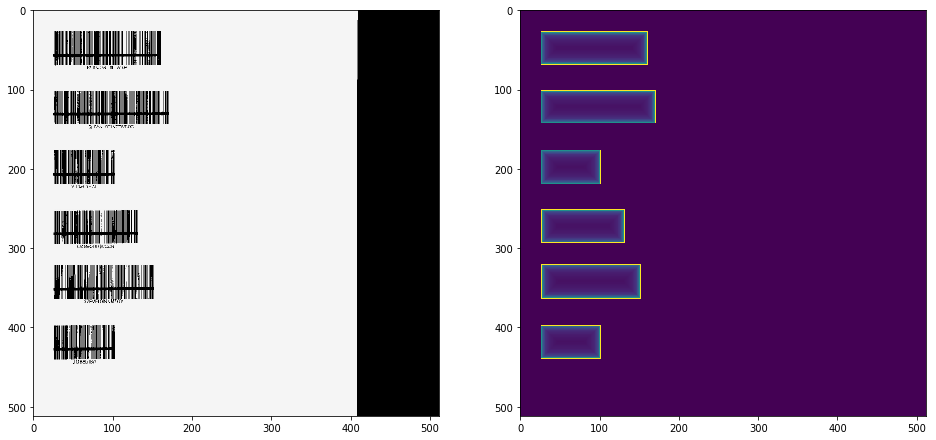

In [338]:
def show_img_from_gen(ax, gen):
    def unprocess(y):
            x = np.copy(y)
            # Zero-decenter by mean pixel
            x[:, :, :, 0] += 103.939
            x[:, :, :, 1] += 116.779
            x[:, :, :, 2] += 123.68

            # 'BGR'->'RGB'
            x = x[:, :, :, ::-1]
            print np.max(x), np.min(x)
            return x / 265.0


    ax.imshow(np.reshape(unprocess(gen[0])[0], gen[0].shape[1:]))
    
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
show_img_from_gen(ax1, gen)
ax2.imshow(np.reshape(gen[1][0], gen[1].shape[1:3]))

gen = next(generator)

In [158]:
import converter
reload(converter)
ssd_converter = converter.Converter(ssd_model)

Exception: ssd model expected

In [55]:
tensors = [gen[1][name] for name in ssd_model.bbox_names + ssd_model.cls_names]

In [56]:
confs, rects = ssd_converter.restore_rects(tensors, top=20)
print confs
for rect in rects:
    print rect

15 15
8 8
(1, 15, 15, 2)
Rect(0.0, 0.0, 0.0, 0.0)
Rect(0.0, 0.0, 0.0, 0.0)
Rect(1.0, 0.0, 1.0, 0.0)
Rect(64.0, 0.0, 64.0, 0.0)
Rect(2.0, 0.0, 2.0, 0.0)
Rect(128.0, 0.0, 128.0, 0.0)
Rect(3.0, 0.0, 3.0, 0.0)
Rect(192.0, 0.0, 192.0, 0.0)
Rect(4.0, 0.0, 4.0, 0.0)
Rect(256.0, 0.0, 256.0, 0.0)
Rect(5.0, 0.0, 5.0, 0.0)
Rect(320.0, 0.0, 320.0, 0.0)
Rect(6.0, 0.0, 6.0, 0.0)
Rect(384.0, 0.0, 384.0, 0.0)
Rect(7.0, 0.0, 7.0, 0.0)
Rect(448.0, 0.0, 448.0, 0.0)
Rect(8.0, 0.0, 8.0, 0.0)
Rect(512.0, 0.0, 512.0, 0.0)
Rect(9.0, 0.0, 9.0, 0.0)
Rect(576.0, 0.0, 576.0, 0.0)
Rect(10.0, 0.0, 10.0, 0.0)
Rect(640.0, 0.0, 640.0, 0.0)
Rect(11.0, 0.0, 11.0, 0.0)
Rect(704.0, 0.0, 704.0, 0.0)
Rect(12.0, 0.0, 12.0, 0.0)
Rect(768.0, 0.0, 768.0, 0.0)
Rect(13.0, 0.0, 13.0, 0.0)
Rect(832.0, 0.0, 832.0, 0.0)
Rect(14.0, 0.0, 14.0, 0.0)
Rect(896.0, 0.0, 896.0, 0.0)
Rect(0.0, 1.0, 0.0, 1.0)
Rect(0.0, 64.0, 0.0, 64.0)
Rect(1.0, 1.0, 1.0, 1.0)
Rect(64.0, 64.0, 64.0, 64.0)
Rect(2.0, 1.0, 2.0, 1.0)
Rect(128.0, 64.0, 128.0, 64.0)

In [57]:
tr = [] #Rect(0.319444444444,0.0138888888889,0.723424641979,0.417869086423)]

In [58]:
i = 0

255.0 17.0
Rect(281.75, 379.5, 384.0, 434.0)
Rect(320.0, 379.5, 418.75, 434.0)
Rect(0, 0, 0.0, 0.0)
Rect(64.0, 0, 64.0, 0.0)
Rect(128.0, 0, 128.0, 0.0)
Rect(192.0, 0, 192.0, 0.0)
Rect(256.0, 0, 256.0, 0.0)
Rect(320.0, 0, 320.0, 0.0)
Rect(384.0, 0, 384.0, 0.0)
Rect(448.0, 0, 448.0, 0.0)
Rect(512.0, 0, 512, 0.0)
Rect(576.0, 0, 512, 0.0)
Rect(640.0, 0, 512, 0.0)
Rect(704.0, 0, 512, 0.0)
Rect(768.0, 0, 512, 0.0)
Rect(832.0, 0, 512, 0.0)
Rect(896.0, 0, 512, 0.0)
Rect(0, 64.0, 0.0, 64.0)
Rect(64.0, 64.0, 64.0, 64.0)
Rect(128.0, 64.0, 128.0, 64.0)


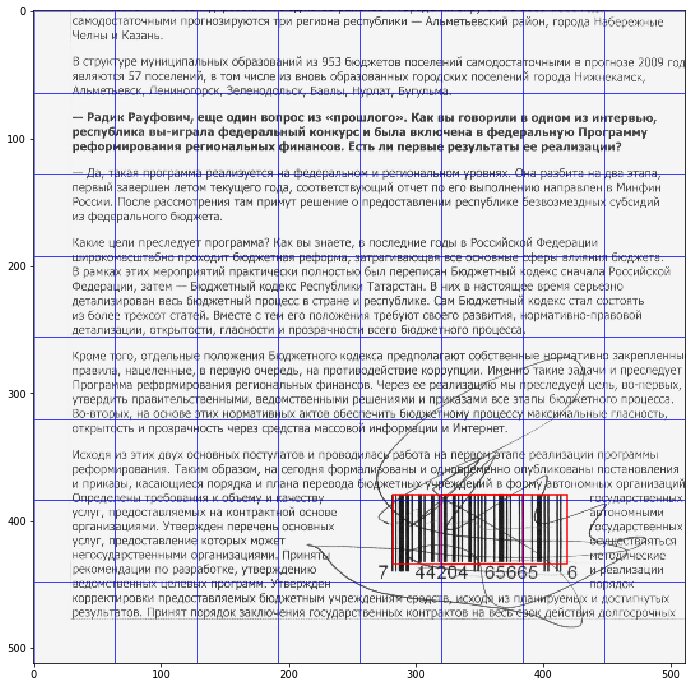

In [61]:
# Create figure and axes
fig,ax = plt.subplots(1, figsize=(12, 12))

# Display the image
show_img_from_gen(ax, gen)
shape = gen[0]['input'].shape[1:3]

#r = patches.Rectangle((50,50),100,100,linewidth=2,edgecolor='r',facecolor='none')
#ax.add_patch(r)

from rect import Rect
def clip_rect(rect, h, w):
    return Rect(max(0, rect.left), max(0, rect.top), min(w, rect.right), min(h, rect.bottom))

for rect in rects[:]:
    # Create a Rectangle patch
    rr = clip_rect(rect, shape[0], shape[1])
    print rr
    #rr.dump()
    #rr.stretch(300, 300)
    #rr.dump()
    r = patches.Rectangle((rr.left,rr.top),rr.width(),rr.height(),linewidth=1.5,edgecolor='r' ,facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(r)
    
cnt = (gen[1]['block4_class'].shape[1] + 1) / 2
edge = shape[0] / cnt
    
for i in range(cnt):
    for j in range(cnt):
    # Create a Rectangle patch
        rr = Rect(edge * i, edge * j, edge * (i + 1), edge * (j + 1))
        r = patches.Rectangle((rr.left,rr.top),rr.width(),rr.height(),linewidth=0.5,edgecolor='b',facecolor='none')

        # Add the patch to the Axes
        ax.add_patch(r)
    
for rect in []: #tr:
    # Create a Rectangle patch
    #rr = rect.copy()
    #rr.stretch(300, 300)
    r = patches.Rectangle((rr.left,rr.top),rr.width(),rr.height(),linewidth=2,edgecolor='g',facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(r)

plt.show()

i += 1